In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import torch
from torchvision import transforms
import torchstain
from PIL import Image
import random

In [2]:
images = np.load("data/images.npy")
labels = np.load("data/labels.npy")


(4981, 256, 256, 3)


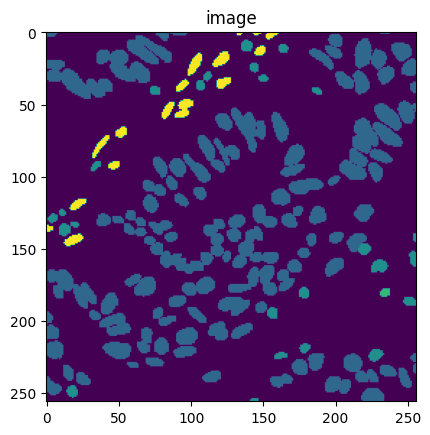

array([0, 2, 3, 4, 6], dtype=uint16)

In [7]:
print(images.shape)
plt.imshow(labels[4320][..., 1])
plt.title("image")
plt.show()
np.unique(labels[4320][..., 1])

(256, 256, 3) (256, 256) uint8 uint8


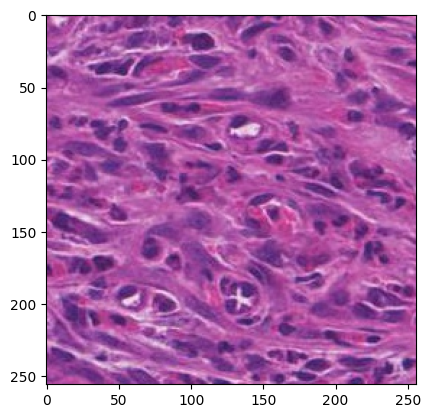

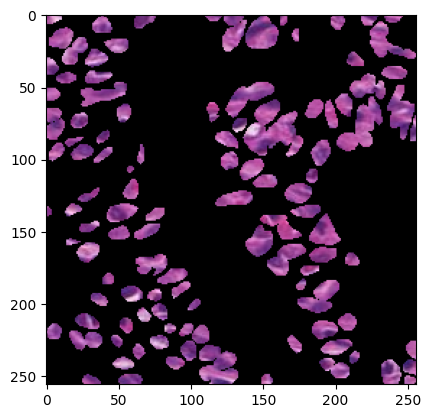

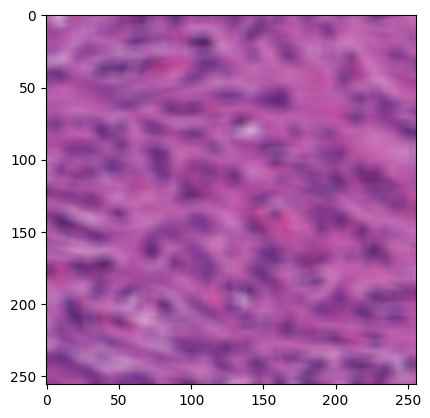

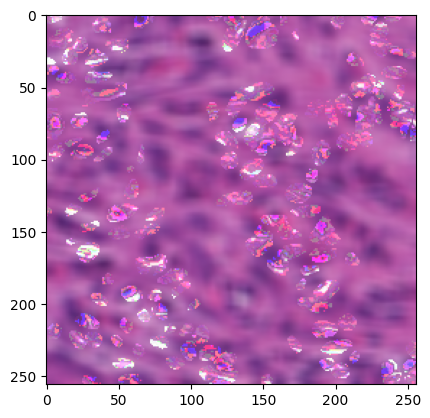

In [8]:
img = images[4000]
mask = labels[0][..., 0].astype(np.uint8)

print(img.shape, mask.shape, img.dtype, mask.dtype)

# mask[mask!=0] = 255
# mask = cv2.merge((mask, mask, mask))

# res = cv2.bitwise_or(img, img, mask=mask)
plt.imshow(img)
plt.show()
# plt.imshow(mask)
# plt.show()
# plt.imshow(res)
# plt.show()

new = np.zeros((256, 256))

back_img = cv2.blur(img, (10, 10), cv2.BORDER_DEFAULT) 

contours, hierarchy= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)
for i, c in enumerate(sorted_contours):
    cv2.drawContours(new, [c], -1, (255), cv2.FILLED)
    
    fg = cv2.bitwise_or(img, img, mask=mask)        
    plt.imshow(fg)
    plt.show()
    # invert mask
    mask_inv = cv2.bitwise_not(mask)    
    #fg_back = cv2.bitwise_or(back_img, back_img, mask=mask)
    fg_back_inv = cv2.bitwise_or(back_img, back_img, mask=mask_inv)
    plt.imshow(fg_back_inv)
    plt.show()
    final = cv2.bitwise_or(fg, fg_back_inv)
    plt.imshow(final)
    plt.show()
    break

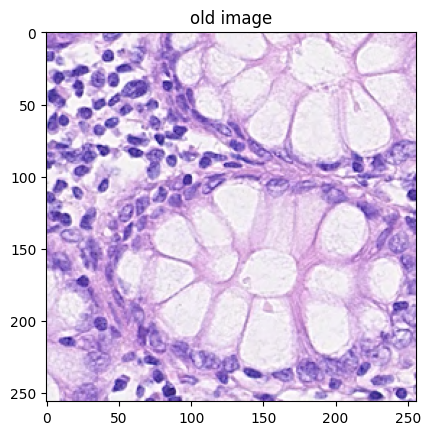

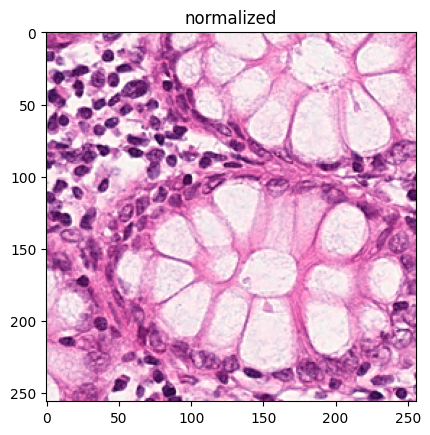

In [9]:
images = np.load("data/images.npy")
labels = np.load("data/labels.npy")

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
from torchvision import transforms
import torchstain

i = 10
target = images[4000]

T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*255)
])

torch_normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
torch_normalizer.fit(T(target))

to_transform = images[i]
t_to_transform = T(to_transform)
norm, _, _ = torch_normalizer.normalize(I=t_to_transform, stains=True)

plt.imshow(images[i])
plt.title("old image")
plt.show()

plt.imshow(norm)
plt.title("normalized")
plt.show()

In [20]:
i = 10
target = images[0]

T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*255)
])

torch_normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
torch_normalizer.fit(T(target))

for j in range(10):
    i = random.randint(1, 4980)

    to_transform = images[i]
    t_to_transform = T(to_transform)
    norm, H, E = torch_normalizer.normalize(I=t_to_transform, stains=True)
    
    # print(images[i].dtype)
    # print(norm.detach().numpy().astype(np.uint8).dtype)
    # break
    im = Image.fromarray(images[i])
    im.save(f"vis/old-{j}.png")
    
    im = Image.fromarray(norm.detach().numpy().astype(np.uint8))
    im.save(f"vis/norm-{j}.png")

# print(np.size(np.unique(labels[i][...,1])))

# plt.imshow(images[i])
# plt.title("old image")
# plt.show()

# plt.imshow(labels[i][...,1])
# plt.title("old image")
# plt.show()

# plt.imshow(norm)
# plt.title("normalized")
# plt.show()

# im = Image.fromarray(images[0])
# im.save("vis/target.png")

# plt.imshow(images[100])
# plt.title("target")
# plt.show()

_LinAlgError: linalg.eigh: The algorithm failed to converge because the input matrix is ill-conditioned or has too many repeated eigenvalues (error code: 2).

[[ 71.33333333  71.33333333  74.66666667 ... 126.33333333 128.
  130.        ]
 [ 69.33333333  66.66666667  69.         ... 111.66666667 122.
  124.33333333]
 [ 77.33333333  71.33333333  73.33333333 ...  96.33333333 111.66666667
  124.66666667]
 ...
 [199.33333333 188.66666667 177.33333333 ... 141.66666667 156.
  155.33333333]
 [215.66666667 207.66666667 204.         ... 144.33333333 149.66666667
  148.66666667]
 [224.         220.66666667 218.33333333 ... 145.66666667 151.33333333
  158.66666667]]
[[[ 82  22 110]
  [ 86  17 111]
  [ 90  20 114]
  ...
  [159  56 164]
  [165  56 163]
  [173  59 158]]

 [[ 78  21 109]
  [ 77  16 107]
  [ 80  17 110]
  ...
  [139  42 154]
  [154  51 161]
  [165  55 153]]

 [[ 92  24 116]
  [ 87  17 110]
  [ 88  18 114]
  ...
  [122  30 137]
  [143  43 149]
  [164  54 156]]

 ...

 [[237 160 201]
  [241 131 194]
  [237 109 186]
  ...
  [165  71 189]
  [181  88 199]
  [183  93 190]]

 [[235 193 219]
  [242 178 203]
  [245 170 197]
  ...
  [169  75 189]
  [1

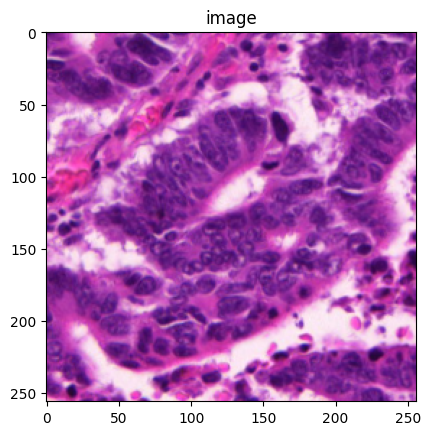

IndexError: boolean index did not match indexed array along dimension 1; dimension is 255 but corresponding boolean dimension is 3

In [41]:
img = images[4320]

print(np.mean(img, axis=2))
print(img)

plt.imshow(img)
plt.title("image")
plt.show()

translation_matrix = np.float32([ [1,0,4], [0,1,4] ])
img_translation = cv2.warpAffine(img, translation_matrix, (255, 255))
mask = np.zeros(img_translation.shape[0:2], dtype=np.uint8)

mask[0 == sum(img_translation)] = 255

print(img_translation.shape)

plt.imshow(img_translation)
plt.title("image")
plt.show()

img_translation = cv2.inpaint(img_translation, mask, 3, cv2.INPAINT_TELEA)

plt.imshow(img_translation)
plt.title("image")
plt.show()

img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(img)
plt.title("image")
plt.show()

img = cv2.flip(img, 0)

plt.imshow(img)
plt.title("image")
plt.show()

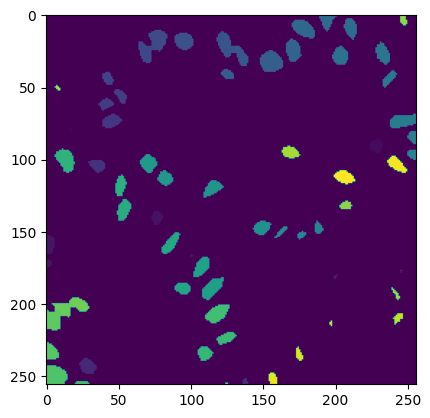

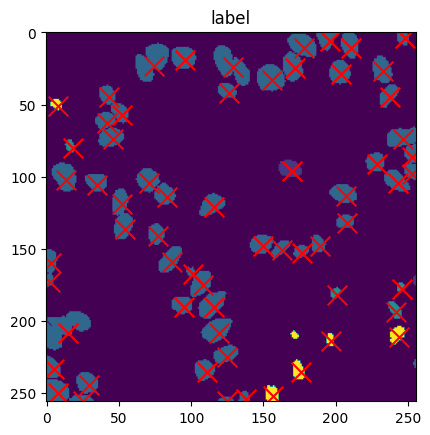

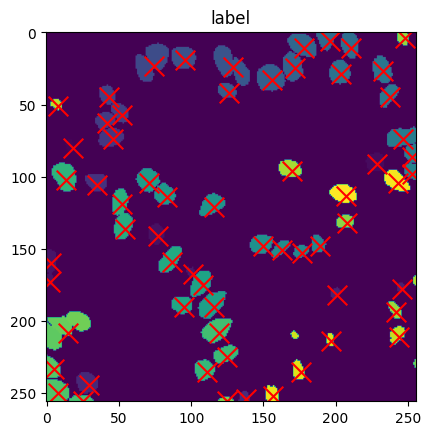

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]


In [5]:
i = 321
individuals = np.uint8(labels[i][...,0])
label = np.uint8(labels[i][...,1])
image = images[i]
size = 32

img = individuals.copy()

image_size = individuals.shape[0]

kernel = np.ones((4, 4), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)

plt.imshow(img_erosion)
plt.show()

# plt.imshow(img)
# plt.show()

contours, hierarchy= cv2.findContours(img_erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

# plt.imshow(label)
# plt.imshow(edges, cmap='jet', alpha=0.5)
# plt.title("label")
# plt.show()

# print(sorted_contours[0][0][0][1])
# fig, ax = plt.subplots()
# plt.imshow(label)
# for c in sorted_contours:
#     x,y,w,h= cv2.boundingRect(c)
#     # print(x, y, w, h)
#     # Create a Rectangle patch
#     rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

#     # Add the patch to the Axes
#     ax.add_patch(rect)
    
# plt.title("label")
# plt.show()

points = []
classes = []

for i, c in enumerate(sorted_contours):
    x,y,w,h= cv2.boundingRect(c)
    slice_h_1 = y-(size-h)//2
    slice_h_2 = y-(size-h)//2 + size
    slice_w_1 = x-(size-w)//2
    slice_w_2 = x-(size-w)//2 + size
    
    # print(slice_w_1, slice_w_2, slice_h_1, slice_h_2)
    middle_x = slice_w_1+(slice_w_2-slice_w_1)//2
    middle_y = slice_h_1+(slice_h_2-slice_h_1)//2
    # print(middle_x, middle_y)
    if middle_x > 255:
        middle_x = 255
    if middle_x < 0:
        middle_x = 0
    if middle_y > 255:
        middle_y = 255
    if middle_y < 0:
        middle_y = 0
    
    if(slice_h_1 < 0): 
        slice_h_1, slice_h_2 = (0, size)
    if(slice_w_1 < 0): 
        slice_w_1, slice_w_2 = (0, size)
    if(slice_h_2 > image_size): 
        slice_h_1, slice_h_2 = (image_size-size, image_size)
    if(slice_w_2 > image_size): 
        slice_w_1, slice_w_2 = (image_size-size, image_size)
    
    img = label[slice_h_1 : slice_h_2, slice_w_1 : slice_w_2]
    current_class = label[middle_x, middle_y]
    classes.append(current_class)
    
    points.append(np.array([middle_x, middle_y]))
    
    # plt.imshow(img)
    # plt.title("image")
    # plt.show()
    # print(current_class)
points = np.array(points)
plt.imshow(label)
plt.scatter(points[:, 0], points[:, 1], marker="x", color="red", s=200)
# plt.imshow(edges, cmap='jet', alpha=0.5)
plt.title("label")
plt.show()

plt.imshow(individuals)
plt.scatter(points[:, 0], points[:, 1], marker="x", color="red", s=200)
plt.title("label")
plt.show()

print(classes)
    

In [7]:
np.unique(individuals)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69], dtype=uint8)

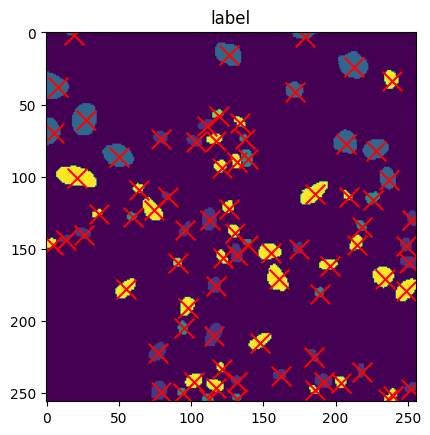

[2, 5, 2, 3, 2, 1, 3, 3, 3, 3, 5, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6]


In [18]:
i = 345
individuals = np.uint8(labels[i][...,0])
label = np.uint8(labels[i][...,1])
image = images[i]
size = 32

img = individuals.copy()

image_size = individuals.shape[0]

points = []
classes = []

for ind in np.unique(individuals):
    if ind == 0:
        continue
    my_img = individuals.copy()
    my_img[my_img != ind] = 0
    contours, hierarchy= cv2.findContours(my_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

    for i, c in enumerate(sorted_contours):
        x,y,w,h= cv2.boundingRect(c)
        slice_h_1 = y-(size-h)//2
        slice_h_2 = y-(size-h)//2 + size
        slice_w_1 = x-(size-w)//2
        slice_w_2 = x-(size-w)//2 + size
        
        cell = label[y:y+h, x:x+w]
        current_class = np.max(cell)
        

        # print(slice_w_1, slice_w_2, slice_h_1, slice_h_2)
        middle_x = slice_w_1+(slice_w_2-slice_w_1)//2
        middle_y = slice_h_1+(slice_h_2-slice_h_1)//2
        # print(middle_x, middle_y)
        if middle_x > 255:
            middle_x = 255
        if middle_x < 0:
            middle_x = 0
        if middle_y > 255:
            middle_y = 255
        if middle_y < 0:
            middle_y = 0

        if(slice_h_1 < 0): 
            slice_h_1, slice_h_2 = (0, size)
        if(slice_w_1 < 0): 
            slice_w_1, slice_w_2 = (0, size)
        if(slice_h_2 > image_size): 
            slice_h_1, slice_h_2 = (image_size-size, image_size)
        if(slice_w_2 > image_size): 
            slice_w_1, slice_w_2 = (image_size-size, image_size)

        img = label[slice_h_1 : slice_h_2, slice_w_1 : slice_w_2]
        classes.append(current_class)

        points.append(np.array([middle_x, middle_y]))

points = np.array(points)
plt.imshow(label)
plt.scatter(points[:, 0], points[:, 1], marker="x", color="red", s=200)
# plt.imshow(edges, cmap='jet', alpha=0.5)
plt.title("label")
plt.show()

print(classes)
    

In [1]:
arr_labels = []
arr_images = []
classes = []
print(images.shape[0])
for n in range(images.shape[0]):
    # n = 40
    size = 32

    individuals = np.uint8(labels[n][...,0])
    label = np.uint8(labels[n][...,1])
    image = images[n]

    image_size = individuals.shape[0]

    edges= cv2.Canny(individuals, 100,200)
    contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)
    
    for (i,c) in enumerate(sorted_contours):
        x,y,w,h= cv2.boundingRect(c)
        slice_h_1 = y-(size-h)//2
        slice_h_2 = y-(size-h)//2 + size
        # slice_h_2 = y+h+(size-h)//2
        slice_w_1 = x-(size-w)//2
        # slice_w_2 = x+w+(size-w)//2
        slice_w_2 = x-(size-w)//2 + size

        if(slice_h_1 < 0): 
            slice_h_1, slice_h_2 = (0, size)
        if(slice_w_1 < 0): 
            slice_w_1, slice_w_2 = (0, size)
        if(slice_h_2 > image_size): 
            slice_h_1, slice_h_2 = (image_size-size, image_size)
        if(slice_w_2 > image_size): 
            slice_w_1, slice_w_2 = (image_size-size, image_size)


        cropped_label = label[slice_h_1 : slice_h_2, slice_w_1 : slice_w_2]
        cropped_image = image[slice_h_1 : slice_h_2, slice_w_1 : slice_w_2]

        arr_labels.append(cropped_label)
        arr_images.append(cropped_image)
        current_class = label[slice_h_1 + size//2][slice_w_1 + size//2]
        classes.append(current_class)
    if n % 1000 == 0:
        print(n)

NameError: name 'images' is not defined

In [251]:
np.array(arr_labels).shape

KeyboardInterrupt: 

In [ ]:
arr_images = np.array(arr_images)
arr_labels = np.array(arr_labels)

In [ ]:
print(arr_images.shape)
print(arr_labels.shape)

In [ ]:
x = 124
print(f'class: {classes[x]}')
plt.imshow(arr_labels[x])
plt.show()
plt.imshow(arr_images[x])
plt.show()


In [ ]:
plt.imshow(image)

In [ ]:
arr = []
for i in range(5):
    test = np.zeros(7, np.uint8)
    test[3] = 1
    arr.append(test)
    
arr = np.array(arr)
torch.tensor(arr)
# np.array(arr)
# torch.tensor(arr)